# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Read

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(2227, 3)

# Data Analysis

In [4]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

We can see that there are some missing values in **x1** and **x2** feature. So let's impute these missing values.

In [6]:
df1 = df.fillna(df.median())
df1.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [7]:
df1.describe()

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.830032,8.935572e+04,0.442299
std,74.856074,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.581453,-7.997687e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.633331,6.374987e+01,1.000000
max,134.508687,1.000000e+08,1.000000


Let's check if thers are any outliers using **boxplots**

<AxesSubplot: >

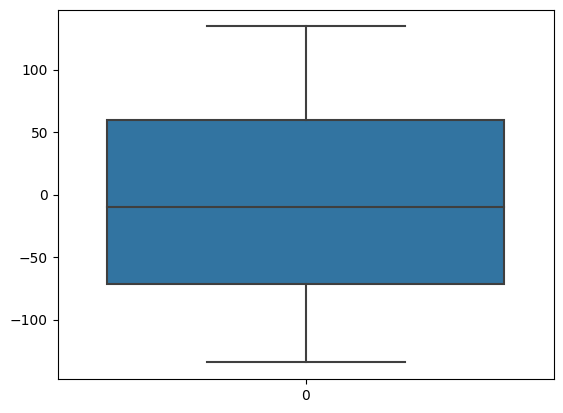

In [8]:
sns.boxplot(df1['x1'])

<AxesSubplot: >

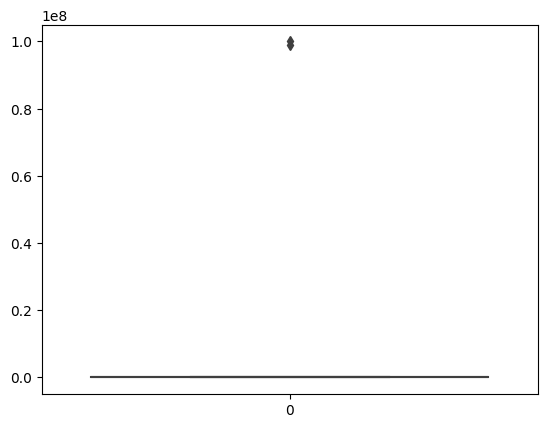

In [9]:
sns.boxplot(df1['x2'])

Here we can see that there are outliers. So let us remove them.

In [10]:
df1['x2'].quantile(0.999)

134.91684456560003

In [11]:
df2 = df1[df1['x2'] <= 135]

In [12]:
df2.describe()

,x1,x2,y
count,2225.000000,2225.000000,2225.000000
mean,-4.913590,-6.651799,0.442697
std,74.835001,79.797226,0.496817
min,-134.369160,-134.876132,0.000000
25%,-71.626564,-80.000000,0.000000
50%,-9.836555,-1.046151,0.000000
75%,59.633331,63.481282,1.000000
max,134.508687,134.929748,1.000000


Let's check for outliers using boxplots

<AxesSubplot: >

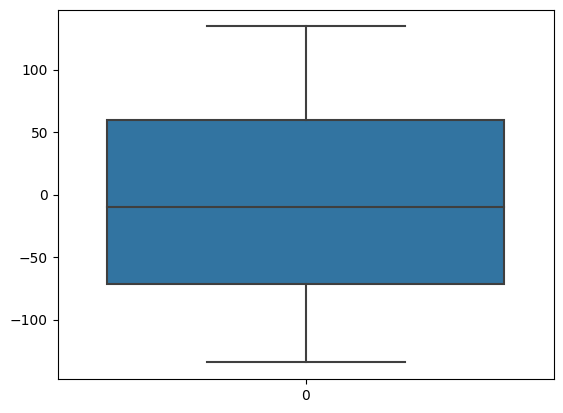

In [13]:
sns.boxplot(df2['x1'])

<AxesSubplot: >

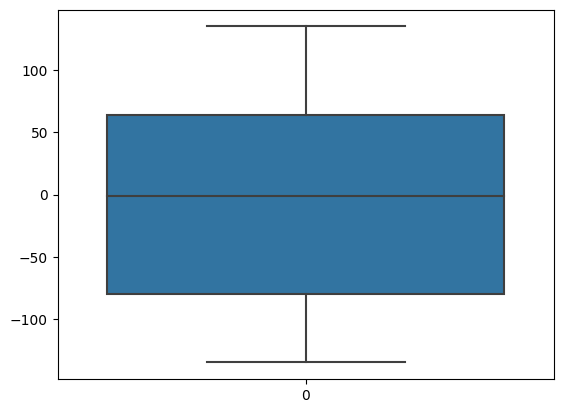

In [14]:
sns.boxplot(df2['x2'])

we can see that there are no outliers in the data set

<AxesSubplot: xlabel='x1', ylabel='x2'>

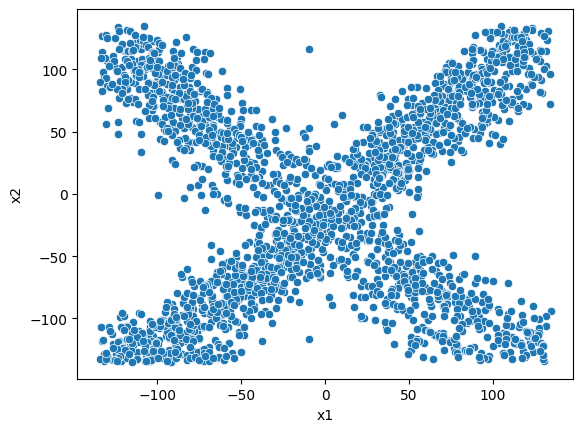

In [15]:
sns.scatterplot(x=df2['x1'], y=df2['x2'])

# Data preprocessing for Model training and evaluation

In [16]:
X = df2.drop(columns=['y'])
y = df2['y']

In [17]:
y.count

<bound method Series.count of 0       1
1       1
2       1
3       1
4       1
       ..
2221    0
2222    0
2223    0
2224    0
2225    0
Name: y, Length: 2225, dtype: int64>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
score = lg.score(X_test, y_test)
print(score)
pred = lg.predict(X_test)
print(classification_report(y_test,pred))


0.7360544217687075
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       412
           1       1.00      0.40      0.57       323

    accuracy                           0.74       735
   macro avg       0.84      0.70      0.69       735
weighted avg       0.82      0.74      0.70       735



In [21]:
# Support Vector Machines with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score1 = svc.score(X_test, y_test)
print(score1)
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

0.7374149659863946
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       412
           1       1.00      0.40      0.57       323

    accuracy                           0.74       735
   macro avg       0.84      0.70      0.69       735
weighted avg       0.82      0.74      0.71       735



In [22]:
# support vector Machines with rbf kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
score2 = svc_rbf.score(X_test, y_test)
print(score2)
pred = svc_rbf.predict(X_test)
print(classification_report(y_test,pred))

0.9442176870748299
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       412
           1       0.98      0.89      0.93       323

    accuracy                           0.94       735
   macro avg       0.95      0.94      0.94       735
weighted avg       0.95      0.94      0.94       735



In [23]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,min_samples_split=30)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

0.9469387755102041
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       412
           1       0.95      0.93      0.94       323

    accuracy                           0.95       735
   macro avg       0.95      0.94      0.95       735
weighted avg       0.95      0.95      0.95       735



In [24]:
# K Nearest Neighbours

# n_neighbours = 5 gives the best result
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

0.9537414965986395
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.96      0.94      0.95       323

    accuracy                           0.95       735
   macro avg       0.95      0.95      0.95       735
weighted avg       0.95      0.95      0.95       735



## Evaluation
- Out of all the Five models, KNN scored the highest.
- Decision Tree and SVC with 'rbf' kernel are close.